In [33]:
import wfdb
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

pat_id = 10

# Read a record from the database
record = wfdb.rdrecord(f'./data/mitdb/{pat_id}')

In [34]:
# Read annotations
annotation = wfdb.rdann(f'./data/mitdb/{pat_id}', 'atr')
symbol = annotation.symbol
location = annotation.sample

In [36]:
# Find RR-intervals and min and max of each set
rr_intervals = []
for i in range(2, len(location)):
    rr_intervals.append(location[i]-location[i-1])

print(rr_intervals)
print(min(rr_intervals))
print(max(rr_intervals))

[313, 315, 321, 336, 344, 324, 313, 313, 310, 329, 330, 329, 323, 326, 319, 313, 328, 329, 325, 305, 302, 313, 320, 323, 319, 309, 307, 305, 295, 307, 325, 328, 309, 302, 293, 285, 290, 290, 288, 283, 290, 272, 274, 283, 290, 303, 307, 283, 272, 279, 286, 291, 300, 304, 301, 294, 282, 282, 285, 297, 291, 290, 290, 291, 302, 313, 320, 329, 344, 332, 310, 322, 321, 331, 344, 331, 317, 316, 314, 316, 320, 334, 330, 304, 302, 327, 330, 336, 318, 313, 309, 316, 302, 294, 312, 315, 306, 299, 301, 297, 325, 324, 313, 315, 303, 301, 299, 302, 310, 315, 299, 288, 301, 308, 310, 314, 305, 312, 308, 304, 309, 323, 326, 331, 318, 311, 317, 316, 321, 327, 263, 65, 216, 92, 289, 278, 286, 101, 196, 295, 293, 276, 278, 278, 270, 279, 292, 289, 301, 293, 283, 286, 299, 302, 310, 310, 299, 296, 289, 284, 289, 304, 304, 297, 277, 279, 270, 279, 289, 298, 286, 287, 278, 274, 273, 282, 293, 294, 286, 280, 274, 296, 297, 293, 298, 305, 301, 296, 300, 311, 334, 340, 336, 317, 297, 303, 321, 324, 332, 334, 3

In [43]:
# Read record numbers
with open('./data/mitdb/RECORDS') as f:
    records = f.readlines()

for i in range(0,len(records)):
    records[i] = int(records[i])
    

In [67]:
# Find RR-intervals for all records
# Check abnormally long/short intervals
rr_intervals = []
check = [] 
check_low = []

for id in records:
    pat_id = id
    annotation = wfdb.rdann(f'./data/mitdb/{pat_id}', 'atr')
    location = annotation.sample
    for i in range(2, len(location)):
        if location[i]-location[i-1] > 1270:
            check.append(id)
        if location[i]-location[i-1] < 25:
            check_low.append(id)
        rr_intervals.append(location[i]-location[i-1])

(array([2.9400e+02, 1.8590e+03, 4.6440e+03, 1.5964e+04, 3.2821e+04,
        3.0903e+04, 1.4871e+04, 7.0300e+03, 2.9980e+03, 6.8800e+02,
        1.3700e+02, 6.6000e+01, 1.0900e+02, 5.6000e+01, 1.2000e+01,
        8.0000e+00, 1.0000e+01, 1.8000e+01, 2.2000e+01, 6.0000e+00,
        6.0000e+00, 9.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 4.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([   6. ,   58.7,  111.4,  164.1,  216.8,  269.5,  322.2,  374.9,
         427.6,  480.3,  533. ,  585.7,  638.4,  691.1,  743.8,  796.5,
         849.2,  901.9,  954.6, 1007.3, 1060. , 1112.7, 1165.4, 1218.1,
        1270.8, 1323.5, 1376.2, 1428.9, 1481.6, 1534.3, 1587. , 1639.7,
        1692.4, 1745.1, 1797.8, 1850.5, 1903.2, 1955.9, 2008.6, 2061.3,
        2114. ]),
 <BarContainer object of 40 artists>)

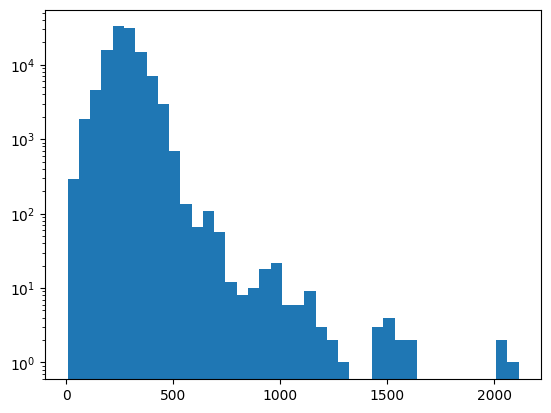

In [63]:
# Plot distribution of RR-intervals
plt.hist(rr_intervals, bins=40, log=True)